

# Project: Investigate a Dataset !

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  his dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment</li>
<li>‘Neighborhood’ indicates the location of the hospital</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família</li>
<li>‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.!)</li>

Questions??
The main question in this investigation is : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment




In [6]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import csv
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [7]:
# Load The data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('Dtat-pro.csv')
df.head()

#   types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

In [9]:
#Descriptive a summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='wrangling'></a>
## Data Cleaning



In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# check for the missing data 
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
# check for duplicate data
sum (df.duplicated())

0

In [13]:
# unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [14]:
# convert data types
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [15]:

# show the data type for each column 
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
# when look in the data in Age apeer (-1 ) drop this row
# find rows which 'Age' is -1

df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
indx = df[df['Age'] == -1].index
df.drop(index=indx, axis=0,inplace=True)

In [19]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
df.loc[df['Age'] == -1]
# to sure is drop or not 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the minimum ,maximum and mean of patient age!)

## 1D) Single dependent variable investgation:

Text(0.5, 1.0, 'Distribution of Age')

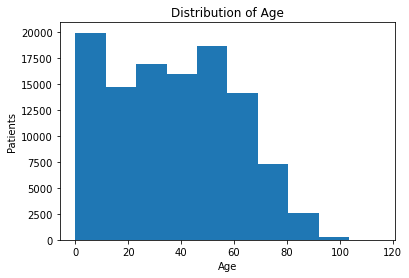

In [22]:

#Plot for Distribution of Age
plt.figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age')

In [39]:
#What is the minimum ,maximum and mean of patient age?

df = df[(df.Age >= 0) & (df.Age <= 90)]

min_age = df['Age'].min()
max_age = df['Age'].max()
mean_age=df['Age'].mean()
print ("The minimum age is {},The maximum age is {} and the mean of age is {}".format(min_age,max_age,mean_age) )

The minimum age is 0,The maximum age is 90 and the mean of age is 36.93161734018037


> Comments:The chart above shows the distribution of age ,The minimum age is 0,The maximum age is 90 and the mean of age is 36.93161734018037


## 1D) Single dependent variable investgation: making a pie chart to have the percentage of who showed up and who is not

20.193616287720697


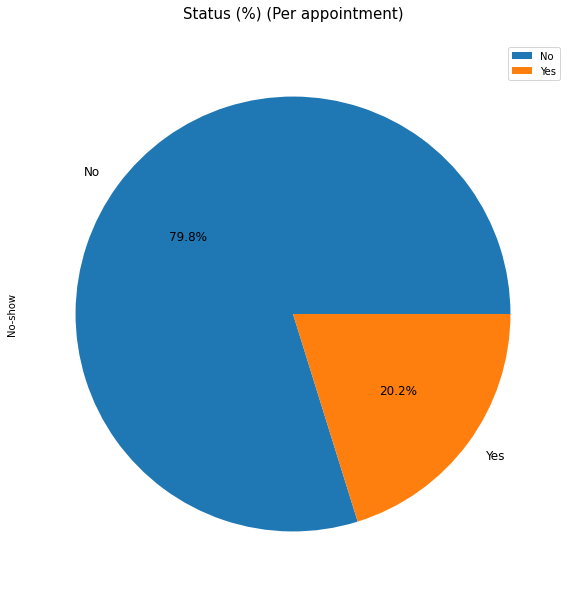

In [44]:
allP = df['No-show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

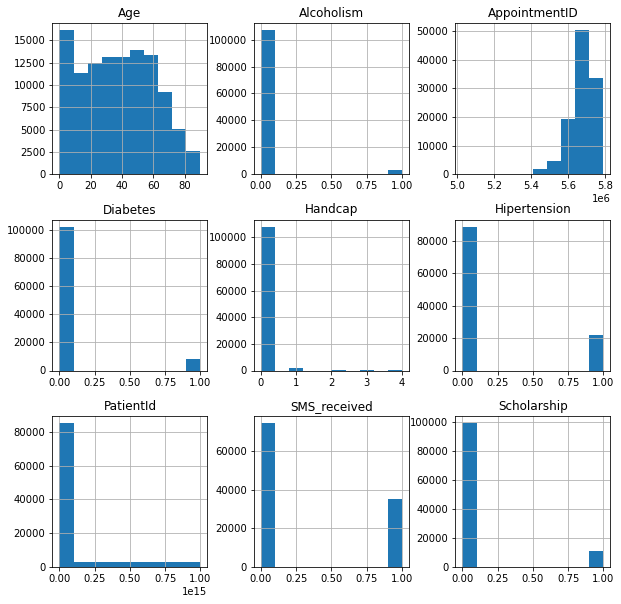

In [45]:
df.hist(figsize=(10, 10));

## 2D ) two dependent variables investgation:Gender  important  to predict if a patient will show up or not ? 

In [41]:
df_temp1 = df.groupby('Gender')['No-show'].value_counts()
df_temp1.head()

Gender  No-show
F       No         57074
        Yes        14545
M       No         30887
        Yes         7712
Name: No-show, dtype: int64

In [42]:
57245 / (14594+57245) *100 # Female

79.68512924734476

In [43]:
30962 / (30962+7725) *100 # Male

80.03205211052808

In [27]:
df_temp1[[1,3]]

Gender  No-show
F       Yes        14545
M       Yes         7712
Name: No-show, dtype: int64

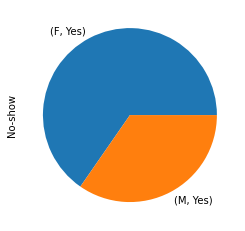

In [28]:
df_temp1[[1,3]].plot.pie()

> Comments: Gender is not important  to predict if a patient will show up 

## 2D ) two dependent variables investgation:SMS received important  to predict if a patient will show up or not ? 

In [29]:
df_temp2 = df.groupby('SMS_received')['No-show'].value_counts()
df_temp2.head()

SMS_received  No-show
0             No         62321
              Yes        12488
1             No         25640
              Yes         9769
Name: No-show, dtype: int64

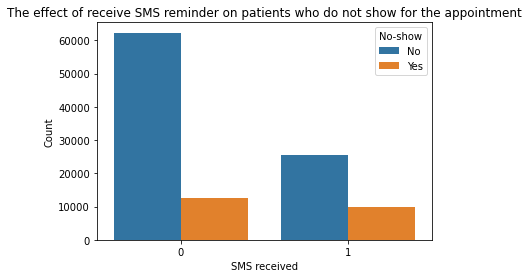

In [35]:
sns.countplot(x='SMS_received',hue='No-show',data=df)
#The code is from here : https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.title('The effect of receive SMS reminder on patients who do not show for the appointment')
plt.ylabel('Count')
plt.xlabel('SMS received');


> Comments:receive SMS  important  to predict if a patient will show up  

## 2D ) two dependent variables investgation:Neighbourhood is important to predict if a patient will show up? => Important.


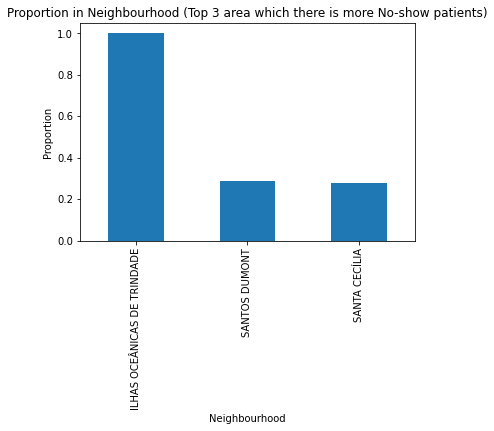

In [36]:
temp = df[df['No-show'] == 'Yes']['Neighbourhood'].value_counts() / df['Neighbourhood'].value_counts()
temp.sort_values(ascending=False)[0:3].plot(kind='bar');
plt.title('Proportion in Neighbourhood (Top 3 area which there is more No-show patients)')
plt.ylabel('Proportion')
plt.xlabel('Neighbourhood');


> Comments:Neighbourhood important  to predict if a patient will show up  


<a id='conclusions'></a>
## Conclusions




>  Age appear from zero and begin to decrease as age increasesThe gender does 

> Not indicate whether the patient shows up for the appointment or not.
The number of patients who receive SMS msg reminder and did not show up for the appointment is higher than the number of patients who did NOT receive an SMS msg reminder and did not show up for the appointment.


>Analysis result is show  which factor is important or not  to predict if a patient will show up : 
 -  Gender is not important  to predict if a patient will show up 
-   receive SMS  important  to predict if a patient will show up  


#Limitations:

We cannot generalize these results of analsis to the world because they are intended for patients in Brazil only.


there is unrealistic data in the dataset such as Age=-1